In [48]:
import numpy as np 
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import re
import seaborn as sns


In [49]:
df = pd.read_csv('rumah123_yogya_unfiltered.csv')
df.head()

,price,nav-link,description,listing-location,bed,bath,carport,surface_area,building_area
0,"Rp 1,79 Miliar",https://www.rumah123.com/properti/sleman/hos17...,Rumah 2 Lantai Baru di jalan Palagan Sleman Y...,"Ngaglik, Sleman",3.0,3.0,2.0,120 m²,110 m²
1,Rp 170 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH BARU DEKAT AL AZHAR DAN UGM,"Jombor, Sleman",3.0,2.0,1.0,102 m²,126 m²
2,Rp 695 Juta,https://www.rumah123.com/properti/sleman/hos17...,RUMAH ASRI DAN SEJUK DI BERBAH SLEMAN DEKAT PA...,"Berbah, Sleman",2.0,2.0,1.0,100 m²,100 m²
3,Rp 560 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah 5 Menit Dari Candi Prambanan Tersi...,"Prambanan, Sleman",3.0,1.0,1.0,109 m²,67 m²
4,Rp 200 Juta,https://www.rumah123.com/properti/sleman/hos17...,Rumah Murah Cicilan 1jt Di Moyudan Sleman,"Moyudan, Sleman",2.0,1.0,1.0,60 m²,30 m²


In [50]:
df.shape

(2020, 9)

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   object 
 1   nav-link          2020 non-null   object 
 2   description       2020 non-null   object 
 3   listing-location  2020 non-null   object 
 4   bed               2001 non-null   float64
 5   bath              1999 non-null   float64
 6   carport           1713 non-null   float64
 7   surface_area      2019 non-null   object 
 8   building_area     2019 non-null   object 
dtypes: float64(3), object(6)
memory usage: 142.2+ KB


In [52]:
df1 = df.drop(['nav-link','description','carport','building_area'], axis='columns')
df1.head()

,price,listing-location,bed,bath,surface_area
0,"Rp 1,79 Miliar","Ngaglik, Sleman",3.0,3.0,120 m²
1,Rp 170 Juta,"Jombor, Sleman",3.0,2.0,102 m²
2,Rp 695 Juta,"Berbah, Sleman",2.0,2.0,100 m²
3,Rp 560 Juta,"Prambanan, Sleman",3.0,1.0,109 m²
4,Rp 200 Juta,"Moyudan, Sleman",2.0,1.0,60 m²


In [53]:
def clean_price(price):
    price = re.sub(r',','.',price)
    price = re.sub(r'Rp\s','',price)
    if "Miliar" in price:
        price = re.sub(r'\sMiliar','',price)
        price = float(price)*1000000000
    elif "Juta" in price:
        price = re.sub(r'\sJuta','',price)
        price = float(price)*1000000
    return price

df1['price'] = df1['price'].apply(clean_price)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   float64
 1   listing-location  2020 non-null   object 
 2   bed               2001 non-null   float64
 3   bath              1999 non-null   float64
 4   surface_area      2019 non-null   object 
dtypes: float64(3), object(2)
memory usage: 79.0+ KB


In [54]:
def clean_surface_area(surface_area):
    surface_area = str(surface_area).split()[0]
    if "-" in surface_area:
        nums = [float(x) for x in surface_area.split("-")]
        return sum(nums)/len(nums)
    return float(surface_area)

df1['surface_area'] = df1['surface_area'].apply(clean_surface_area)

In [55]:
df1['location'] = [x.split(',')[-1] for x in df['listing-location']]

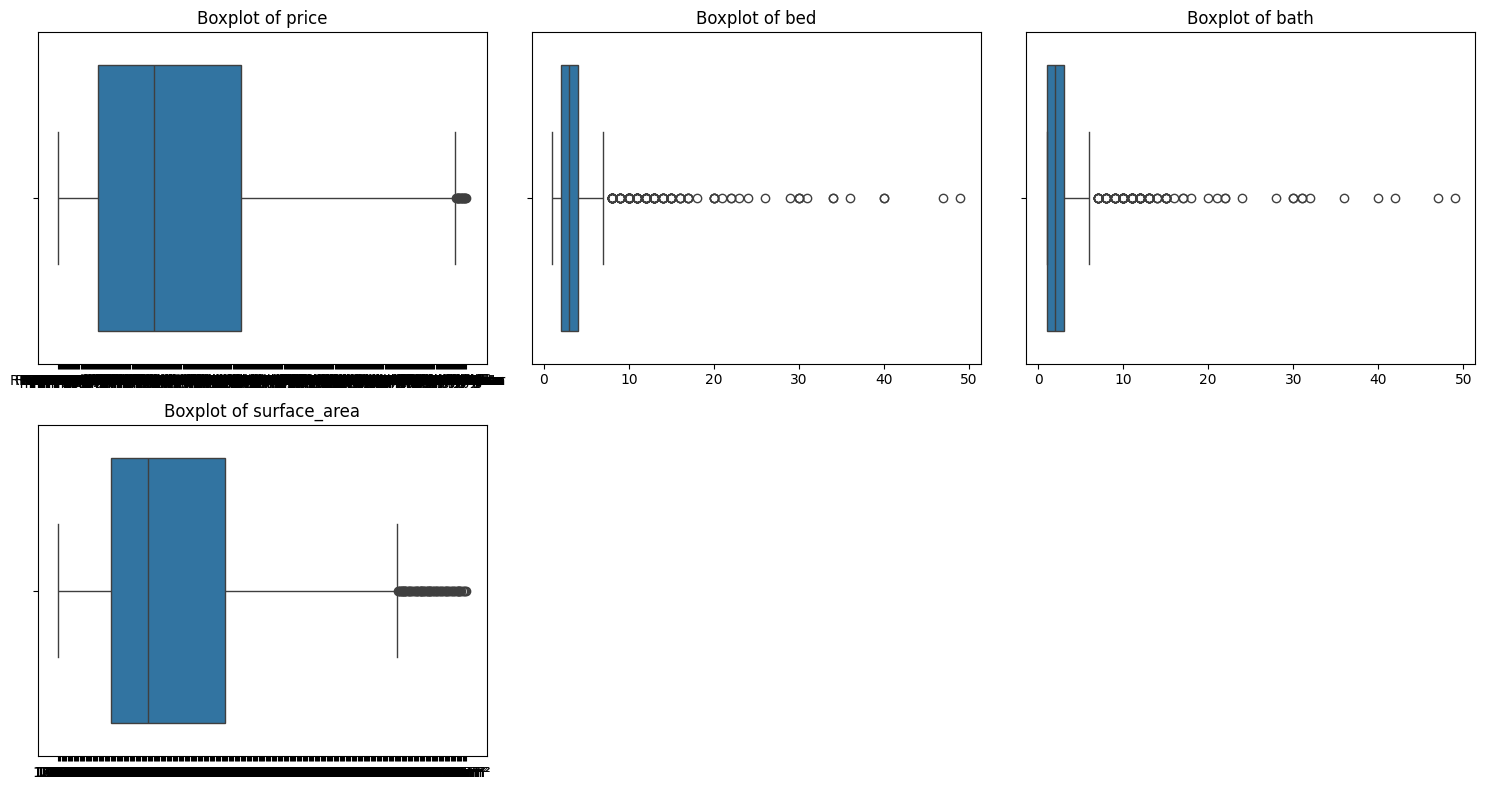

In [56]:
numerical_columns = df1.select_dtypes(exclude=['object']).columns.to_list()

plt.figure(figsize=(15,8))
for i,x in enumerate(numerical_columns):
    plt.subplot(2,3,i+1)
    sns.boxplot(data=df, x = x)
    plt.title(f"Boxplot of {x}")
    plt.xlabel("")
    plt.ylabel("")
plt.tight_layout()

In [57]:
print("Jumlah missing values:")
print(df1.isnull().sum())

Jumlah missing values:
price                0
listing-location     0
bed                 19
bath                21
surface_area         1
location             0
dtype: int64


In [64]:
df1['bed'] = df1['bed'].replace('', np.nan).astype(float)
df1['bed'].fillna(df1['bed'].median(), inplace=True)

df1['bath'] = df1['bath'].replace('', np.nan).astype(float)
df1['bath'].fillna(df1['bath'].median(), inplace=True)

df1['surface_area'] = df1['surface_area'].replace('', np.nan).astype(float)
df1['surface_area'].fillna(df1['surface_area'].median(), inplace=True)


In [65]:
print("Jumlah missing values:")
print(df1.isnull().sum())

Jumlah missing values:
price               0
listing-location    0
bed                 0
bath                0
surface_area        0
location            0
dtype: int64


In [66]:
df1['price'] = df1['price'].astype('int64')
df1['bed'] = df1['bed'].astype('int64')
df1['bath'] = df1['bath'].astype('int64')
df1['surface_area'] = df1['surface_area'].astype('float64')
df1['location'] = df1['location'].str.strip()

In [67]:
print("\nPerbandingan statistik antara df dan df1:")
print("df:")
print(df[['bed', 'bath']].describe())

print("\ndf1:")
print(df1[['bed', 'bath']].describe())



Perbandingan statistik antara df dan df1:
df:
               bed         bath
count  2001.000000  1999.000000
mean      3.969015     2.941971
std       3.671654     3.517671
min       1.000000     1.000000
25%       2.000000     1.000000
50%       3.000000     2.000000
75%       4.000000     3.000000
max      49.000000    49.000000

df1:
               bed         bath
count  2020.000000  2020.000000
mean      3.959901     2.932178
std       3.655534     3.500634
min       1.000000     1.000000
25%       2.000000     1.000000
50%       3.000000     2.000000
75%       4.000000     3.000000
max      49.000000    49.000000


In [68]:
df1.head()

,price,listing-location,bed,bath,surface_area,location
0,1790000000,"Ngaglik, Sleman",3,3,120.0,Sleman
1,170000000,"Jombor, Sleman",3,2,102.0,Sleman
2,695000000,"Berbah, Sleman",2,2,100.0,Sleman
3,560000000,"Prambanan, Sleman",3,1,109.0,Sleman
4,200000000,"Moyudan, Sleman",2,1,60.0,Sleman


In [69]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             2020 non-null   int64  
 1   listing-location  2020 non-null   object 
 2   bed               2020 non-null   int64  
 3   bath              2020 non-null   int64  
 4   surface_area      2020 non-null   float64
 5   location          2020 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 94.8+ KB


In [70]:
df1.to_csv('cleaned.csv', index=False)

Text(0.5, 1.0, 'Distribution of Location in Yogyakarta')

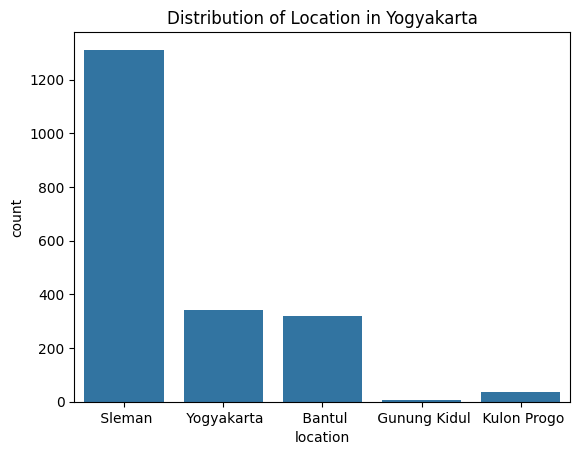

In [ ]:
sns.countplot(data = df1, x = 'location')
plt.title(f"Distribution of Location in Yogyakarta")

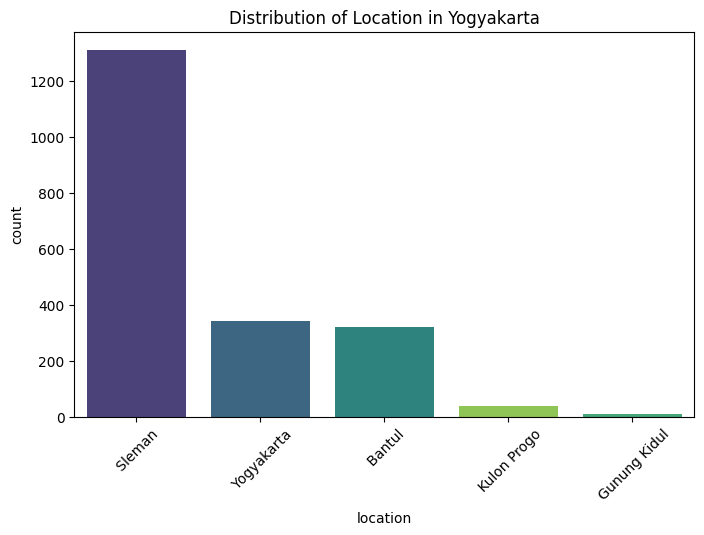

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df1, x='location', hue='location', order=df1['location'].value_counts().index, palette="viridis", legend=False)
plt.title("Distribution of Location in Yogyakarta")
plt.xticks(rotation=45)
plt.show()